<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/AgenticAI/blob/main/Deep_Learning_Darsman/V42_Cifar10_Params.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Libs

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

> Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3), Labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Labels shape: (10000, 1)


In [3]:
print(f"Training data: \n{x_train[0][0]}")
print(f"\n\nLabels: \n{y_train[0]}")

Training data: 
[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]


Labels: 
[6]


> Normalization

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
print(f"Training data: \n{x_train[0][0]}")
print(f"\n\nLabels: \n{y_train[0]}")

Training data: 
[[0.23137255 0.24313725 0.24705882]
 [0.16862745 0.18039216 0.17647059]
 [0.19607843 0.18823529 0.16862745]
 [0.26666667 0.21176471 0.16470588]
 [0.38431373 0.28627451 0.20392157]
 [0.46666667 0.35686275 0.24705882]
 [0.54509804 0.41960784 0.29411765]
 [0.56862745 0.43137255 0.31372549]
 [0.58431373 0.45882353 0.34901961]
 [0.58431373 0.47058824 0.36470588]
 [0.51372549 0.40392157 0.30196078]
 [0.49019608 0.38823529 0.29803922]
 [0.55686275 0.45098039 0.35686275]
 [0.56470588 0.43921569 0.3372549 ]
 [0.5372549  0.41176471 0.30980392]
 [0.50588235 0.38039216 0.27843137]
 [0.5372549  0.41568627 0.30980392]
 [0.5254902  0.41568627 0.29803922]
 [0.48627451 0.38039216 0.25098039]
 [0.54509804 0.44313725 0.30588235]
 [0.54509804 0.43921569 0.29411765]
 [0.52156863 0.41176471 0.27058824]
 [0.53333333 0.41176471 0.29019608]
 [0.54509804 0.42352941 0.30196078]
 [0.59607843 0.47058824 0.34901961]
 [0.63921569 0.51372549 0.39215686]
 [0.65882353 0.53333333 0.42352941]
 [0.62352941

> OneHot Encoding

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"\n\nTrain Labels Shape: \n{y_train.shape}")
print(f"\n\nTrain Labels: \n{y_train[0]}")
print(f"\n\nTest Labels: \n{y_test[0]}")



Train Labels Shape: 
(50000, 10)


Train Labels: 
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Test Labels: 
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


> Model Definition

In [7]:
model = Sequential([
    Conv2D(input_shape=(32, 32, 3), filters=96, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),

    Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),

    Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Flatten(),

    Dense(4096, activation='relu'),
    Dropout(0.5),

    Dense(4096, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


> Compile & Train

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 46ms/step - accuracy: 0.3309 - loss: 2.8739 - val_accuracy: 0.4205 - val_loss: 1.5851
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.5535 - loss: 1.2974 - val_accuracy: 0.5388 - val_loss: 1.3333
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.6521 - loss: 1.0411 - val_accuracy: 0.5919 - val_loss: 1.1740
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7094 - loss: 0.8733 - val_accuracy: 0.7037 - val_loss: 0.9236
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.7636 - loss: 0.7215 - val_accuracy: 0.7531 - val_loss: 0.7883
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.8080 - loss: 0.5931 - val_accuracy: 0.7850 - val_loss: 0.6706
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.8377 - loss: 0.4941 - val_accuracy: 0.7303 - val_loss: 0.8035
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.8691 - loss: 0.4019 - 

> Performance

In [10]:
print(history.history['accuracy'])
print(history.history['loss'])
print(history.history['val_accuracy'])
print(history.history['val_loss'])

[0.41707998514175415, 0.5799199938774109, 0.6609799861907959, 0.719760000705719, 0.7666000127792358, 0.8071399927139282, 0.8358799815177917, 0.8677200078964233, 0.893779993057251, 0.9133800268173218]
[1.8490628004074097, 1.2324111461639404, 1.0149387121200562, 0.8526861667633057, 0.7104094624519348, 0.5968172550201416, 0.5012774467468262, 0.4058269262313843, 0.33284059166908264, 0.2717045843601227]
[0.4205000102519989, 0.5388000011444092, 0.5918999910354614, 0.7037000060081482, 0.7530999779701233, 0.7850000262260437, 0.7303000092506409, 0.5429999828338623, 0.7458999752998352, 0.7638999819755554]
[1.5850605964660645, 1.3333297967910767, 1.173970103263855, 0.9235573410987854, 0.7882655262947083, 0.6705846786499023, 0.8034998774528503, 1.4103516340255737, 0.8279188275337219, 0.8061657547950745]


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

313/313 - 3s - 10ms/step - accuracy: 0.7639 - loss: 0.8062
Test Loss: 0.806165874004364
Test Accuracy: 0.7638999819755554


> Plot

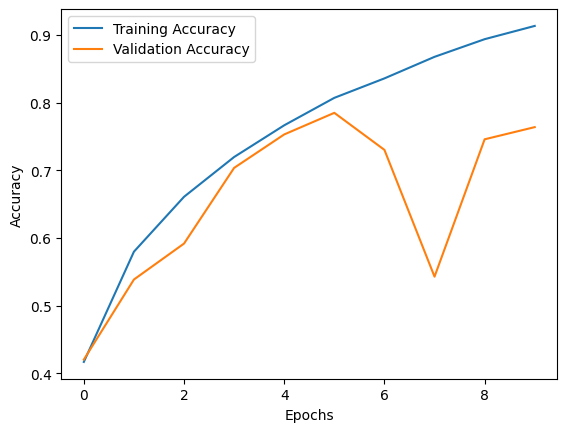

In [12]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

> Testing Model

In [ ]:
img_path = '/content/drive/MyDrive/images/example3.jpg'
img = image.load_img(img_path, target_size=(32, 32))


img_array = image.img_to_array(img)
print(img_array.shape)

img_array = img_array / 255.0

img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)


predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
print(f"Predicted class index: {predicted_class_index}")

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Predicted label: {class_names[predicted_class_index]}", )